In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
raw_data = pd.read_csv("https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv",skiprows=1)

In [3]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202537          7    948        0    1992       1           0   
1     202536          7   1608      334    2882       2           0   
2     202535          7   1327      162    2492       2           0   
3     202534          7   1438       48    2828       2           0   
4     202533          7   3579      692    6466       5           1   
5     202532          7   2384        0    4809       4           0   
6     202531          7   5703        0   13082       9           0   
7     202530          7   7102     3590   10614      11           6   
8     202529          7   6385     3384    9386      10           6   
9     202528          7   5584     3123    8045       8           4   
10    202527          7   5667     2850    8484       8           4   
11    202526          7   5872     3285    8459       9           5   
12    202525          7   5953     3698    8208       9           6   
13    202524          7   4580     2558    6602       7           4   
14    202523          7   4911     2663    7159       7           4   
15    202522          7   6837     3940    9734      10           6   
16    202521          7   4693     2653    6733       7           4   
17    202520          7   3083     1535    4631       5           3   
18    202519          7   5084     1997    8171       8           3   
19    202518          7   5003     2718    7288       7           4   
20    202517          7   6246     3424    9068       9           5   
21    202516          7   6151     3193    9109       9           5   
22    202515          7   5557     3262    7852       8           5   
23    202514          7   4984     2858    7110       7           4   
24    202513          7   5964     3608    8320       9           5   
25    202512          7   3855     1995    5715       6           3   
26    202511          7   5878     2747    9009       9           4   
27    202510          7   2921     1421    4421       4           2   
28    202509          7   3381     1468    5294       5           2   
29    202508          7   2835     1286    4384       4           2   
...      ...        ...    ...      ...     ...     ...         ...   
1785  199126          7  17608    11304   23912      31          20   
1786  199125          7  16169    10700   21638      28          18   
1787  199124          7  16171    10071   22271      28          17   
1788  199123          7  11947     7671   16223      21          13   
1789  199122          7  15452     9953   20951      27          17   
1790  199121          7  14903     8975   20831      26          16   
1791  199120          7  19053    12742   25364      34          23   
1792  199119          7  16739    11246   22232      29          19   
1793  199118          7  21385    13882   28888      38          25   
1794  199117          7  13462     8877   18047      24          16   
1795  199116          7  14857    10068   19646      26          18   
1796  199115          7  13975     9781   18169      25          18   
1797  199114          7  12265     7684   16846      22          14   
1798  199113          7   9567     6041   13093      17          11   
1799  199112          7  10864     7331   14397      19          13   
1800  199111          7  15574    11184   19964      27          19   
1801  199110          7  16643    11372   21914      29          20   
1802  199109          7  13741     8780   18702      24          15   
1803  199108          7  13289     8813   17765      23          15   
1804  199107          7  12337     8077   16597      22          15   
1805  199106          7  10877     7013   14741      19          12   
1806  199105          7  10442     6544   14340      18          11   
1807  199104          7   7913     4563   11263      14           8   
1808  199103          7  15387    10484   20290      27          18   
1809  199102          7  16277  

In [4]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [6]:
sorted_data = data.set_index('period').sort_index()

In [7]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

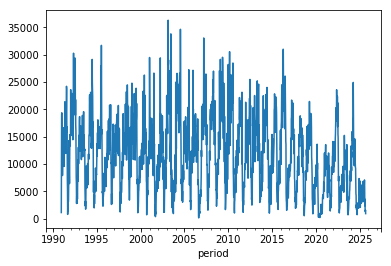

In [8]:
sorted_data['inc'].plot()

In [21]:
first_august_week = [pd.Period(pd.Timestamp(y, 10, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [22]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

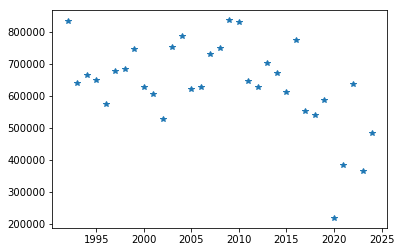

In [23]:
yearly_incidence.plot(style='*')

In [24]:
yearly_incidence.sort_values()

2020    217605
2023    364553
2021    382779
2024    483209
2002    526035
2018    540799
2017    552105
1996    574093
2019    585143
2001    606520
2015    611634
2005    620796
2006    626180
2012    627384
2000    627405
2022    635251
1993    638384
2011    644660
1995    650679
1994    664684
2014    672401
1997    677145
1998    682638
2013    703305
2007    729321
1999    746617
2008    750410
2003    752007
2016    775321
2004    786328
2010    830938
1992    834566
2009    836245
dtype: int64